# to do

- test the resampling portion -- not working well even with the already resampled files?

In [1]:
from globals import *
# plt.style.use('dark_background')

In [2]:
# types of biosignals
biosig_names = ["EMG","IMU","LeapLeft","LeapRight","RGBcamera","SynchData"]
# data_sub_folder = '/movavg_files_resample/'
add_IMU = True
only_IMU = False
from onedollar import Onedollar

data_folders = ['movavg_files_resample','IMU_resample']

IndentationError: expected an indented block (onedollar.py, line 215)

# original gesture recognizer for experimenter defined gestures

In [23]:
def get_dollar_accuracy(participantID,n_templates=3):
    random.seed(N_seed)
    path = global_path +participantID+"\\"
    save_path = temp_path + participantID + "\\"
    
    movavg_files = os.listdir(save_path+data_folders[0]+'/')
    experiment_types = pd.DataFrame()
    for pcaf in movavg_files:
        experiment_types = pd.concat([experiment_types,
            pd.DataFrame({'kind':[pcaf.split("_")[2]],
            'motion':[pcaf.split("_")[4]],
            'rep':[pcaf.split("_")[5]],
            'filename':[pcaf]})], ignore_index=True)
    experiment_types = experiment_types[experiment_types['kind'] == 'experimenter-defined']
    
    # define templates
    types = experiment_types['motion'].unique()
    experiment_types['template'] = [False for row in range(len(experiment_types))]
    for ty in types:
        experiment_types.loc[experiment_types[experiment_types['motion'] == ty].sample(n_templates).index,'template'] = True
    templates = experiment_types[experiment_types['template'] == True]
    # define template data for 1st gesture
    templates_for_dollar = []
    for t in range(len(templates)):
            fname = templates.filename.iloc[t]
            # print(global_path+participantID+'/'+data_folders[0]+'/' + fname)
            temp_file = np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[0]+'/' + fname,index_col=0))
            if add_IMU:
                IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
                temp_file = np.hstack([temp_file,np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0))])
            elif only_IMU:
                IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
                temp_file = np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0))
            df_movavg = temp_file.flatten('F')
            df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
            templates_for_dollar.append((templates.motion.iloc[t],df_movavg.tolist()))
#         if t==np.random.randint(0,len(templates)-1):
#             plt.figure()
#             plt.plot(df_movavg[:,0],df_movavg[:,1])
#             plt.show()
    templates_for_dollar = np.asarray(templates_for_dollar,dtype=object)
    doll = Onedollar(templates_for_dollar)
     
    # define test data
    test_data = experiment_types[experiment_types['template'] == False].copy()
    test_data = test_data.reset_index()
    test_data['classified_motion'] = ['' for e in range(len(test_data))]  
    test_data_for_dollar = []
    
    for t in range(len(test_data)):
        if add_IMU:
            fname = test_data.loc[t,'filename']
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            EMG_file = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+fname,index_col=0)
            IMU_file = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/'+ IMU_fname,index_col=0)
            df_pca = pd.concat([EMG_file, IMU_file.set_index(EMG_file.index)], axis=1)
        elif only_IMU:
            fname = test_data.loc[t,'filename']
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0)
        else:
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+ test_data.loc[t,'filename'],index_col=0)
        df_pca = np.asarray(df_pca)
        df_movavg = df_pca.flatten('F')
        df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
        test_data.loc[t,'classified_motion'] = doll.get_gesture(df_movavg.tolist())
        
#     test_data.to_csv(save_path + 'movavg_template_classification.csv')
    print(participantID,"accuracy: ",accuracy_score(test_data['motion'],test_data['classified_motion']))
    c = confusion_matrix(test_data['motion'],test_data['classified_motion'],labels=types)
    # disp = ConfusionMatrixDisplay(c,display_labels=types)
    # disp.plot()
    plt.xticks(rotation=45)
    plt.title(participantID)
    plt.savefig('figs/confusion-'+participantID+'.png',dpi=400,transparent=True,bbox_inches = "tight")
    # plt.show()
    return accuracy_score(test_data['motion'],test_data['classified_motion'])

P102 accuracy:  0.8309859154929577
P103 accuracy:  1.0
P104 accuracy:  0.75
P105 accuracy:  0.7534246575342466
P106 accuracy:  0.7857142857142857
P107 accuracy:  0.9571428571428572
P108 accuracy:  0.8028169014084507
P109 accuracy:  0.8591549295774648
P110 accuracy:  0.9142857142857143
P111 accuracy:  0.9
P112 accuracy:  0.9714285714285714
P114 accuracy:  0.6428571428571429
P115 accuracy:  0.7605633802816901
P116 accuracy:  0.9733333333333334
P118 accuracy:  0.958904109589041
P119 accuracy:  0.8194444444444444
P121 accuracy:  0.9512195121951219
P122 accuracy:  0.92
P123 accuracy:  0.8333333333333334
P124 accuracy:  0.8571428571428571
P125 accuracy:  0.8648648648648649
P126 accuracy:  0.8142857142857143
P127 accuracy:  0.8285714285714286
P128 accuracy:  0.9857142857142858
P131 accuracy:  0.8857142857142857
P132 accuracy:  0.8028169014084507


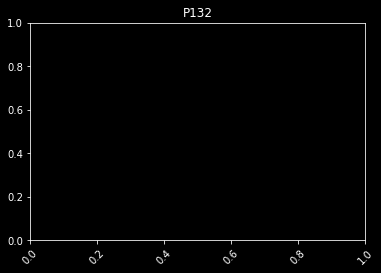

In [24]:
# pID = 'P109'
# global_path = "D:\\Research\\OneDrive - UW\\Data\\UW biosignal gesture study\\with disability cleaned data\\" # home
accuracy_scores = []
for pID in pIDs:
    accuracy_scores.append(get_dollar_accuracy(pID))
accuracy_scores = np.asarray(accuracy_scores)

In [25]:
np.mean(accuracy_scores)

0.8624507471661749

P001 accuracy:  0.7571428571428571
P003 accuracy:  0.8571428571428571
P004 accuracy:  0.7857142857142857
P005 accuracy:  0.5428571428571428
P006 accuracy:  0.7428571428571429
P008 accuracy:  0.8571428571428571
P010 accuracy:  0.8285714285714286
P011 accuracy:  0.5857142857142857


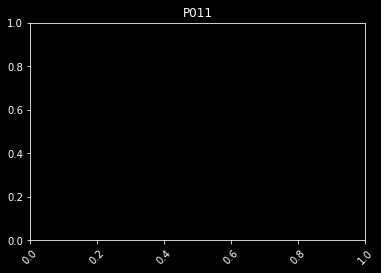

In [26]:
accuracy_scores_unimpaired = []
for pID in pIDs_unimpaired:
    accuracy_scores_unimpaired.append(get_dollar_accuracy(pID))
accuracy_scores_unimpaired = np.asarray(accuracy_scores_unimpaired)

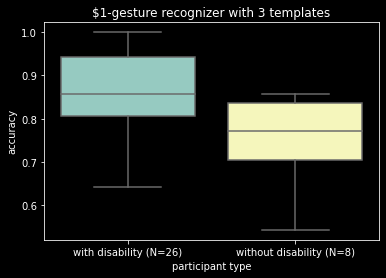

In [27]:
df = pd.DataFrame({'accuracy': accuracy_scores,
                  'participant type': 'with disability (N=26)'})
df = pd.concat([df,pd.DataFrame({'accuracy': accuracy_scores_unimpaired,
                  'participant type': 'without disability (N=8)'})])
# df
sns.boxplot(data=df,x="participant type",y="accuracy")
plt.title("\$1-gesture recognizer with 3 templates")
plt.savefig('figs/one-dollar.png',dpi=500,bbox_inches='tight')
plt.show()

# incorporating just the rehab gestures

In [30]:
def get_rotate_accuracy(participantID,n_templates=3):
    random.seed(N_seed)
    path = global_path +participantID+"\\"
    save_path = temp_path + participantID + "\\"
    
    movavg_files = os.listdir(save_path+data_folders[0]+'/')
    experiment_types = pd.DataFrame()
    for pcaf in movavg_files:
        experiment_types = pd.concat([experiment_types,
            pd.DataFrame({'kind':[pcaf.split("_")[2]],
            'motion':[pcaf.split("_")[4]],
            'rep':[pcaf.split("_")[5]],
            'filename':[pcaf]})], ignore_index=True)
    experiment_types_rehab = experiment_types[(experiment_types['kind'] == 'rehab') & (experiment_types['motion'] != 'endurance')]
    experiment_types_rehab = experiment_types_rehab.replace(experiment_types_rehab['motion'].unique(),'rotate')
    experiment_types = experiment_types[experiment_types['kind'] == 'experimenter-defined']
    # define templates
    types = experiment_types['motion'].unique()
    experiment_types['template'] = [False for row in range(len(experiment_types))]
    for ty in types:
        experiment_types.loc[experiment_types[experiment_types['motion'] == ty].sample(n_templates).index,'template'] = True
    templates = experiment_types[experiment_types['template'] == True]
    # define template data for 1st gesture
    templates_for_dollar = []
    for t in range(len(templates)):
            fname = templates.filename.iloc[t]
            temp_file = np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[0]+'/' + fname,index_col=0))
            if add_IMU:
                IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
                temp_file = np.hstack([temp_file,np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0))])
            elif only_IMU:
                IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
                temp_file = np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0))
            df_movavg = temp_file.flatten('F')
            df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
            templates_for_dollar.append((templates.motion.iloc[t],df_movavg.tolist()))
#         if t==np.random.randint(0,len(templates)-1):
#             plt.figure()
#             plt.plot(df_movavg[:,0],df_movavg[:,1])
#             plt.show()
    templates_for_dollar = np.asarray(templates_for_dollar,dtype=object)
    doll = Onedollar(templates_for_dollar)
     
    # define test data
    
    test_data = experiment_types_rehab
    test_data = test_data.reset_index()
    test_data['classified_motion'] = ['' for e in range(len(test_data))]  
    test_data_for_dollar = []
    
    for t in range(len(test_data)):
        if add_IMU:
            fname = test_data.loc[t,'filename']
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            EMG_file = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+fname,index_col=0)
            IMU_file = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/'+ IMU_fname,index_col=0)
            df_pca = pd.concat([EMG_file, IMU_file.set_index(EMG_file.index)], axis=1)
        elif only_IMU:
            fname = test_data.loc[t,'filename']
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0)
        else:
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+ test_data.loc[t,'filename'],index_col=0)
        df_pca = np.asarray(df_pca)
        df_movavg = df_pca.flatten('F')
        df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
        test_data.loc[t,'classified_motion'] = doll.get_gesture(df_movavg.tolist())
        
#     test_data.to_csv(save_path + 'movavg_template_classification.csv')
    print(participantID,"accuracy: ",accuracy_score(test_data['motion'],test_data['classified_motion']))
    # c = confusion_matrix(test_data['motion'],test_data['classified_motion'],labels=types)
    return accuracy_score(test_data['motion'],test_data['classified_motion'])

In [31]:
accuracy_scores_rotate = []
for pID in pIDs:
    accuracy_scores_rotate.append(get_rotate_accuracy(pID))
accuracy_scores_rotate = np.asarray(accuracy_scores_rotate)

P102 accuracy:  0.0
P103 accuracy:  0.6
P104 accuracy:  0.41935483870967744
P105 accuracy:  0.0
P106 accuracy:  0.5666666666666667
P107 accuracy:  0.3225806451612903
P108 accuracy:  0.5
P109 accuracy:  0.8
P110 accuracy:  0.5333333333333333
P111 accuracy:  0.23333333333333334
P112 accuracy:  0.6
P114 accuracy:  0.0
P115 accuracy:  0.3
P116 accuracy:  0.5
P118 accuracy:  0.3870967741935484
P119 accuracy:  0.26666666666666666
P121 accuracy:  0.40625
P122 accuracy:  0.36666666666666664
P123 accuracy:  0.9666666666666667
P124 accuracy:  0.3225806451612903
P125 accuracy:  0.0
P126 accuracy:  0.8387096774193549
P127 accuracy:  0.9666666666666667
P128 accuracy:  0.6451612903225806


c:\Users\yamag\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\yamag\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\yamag\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\yamag\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


P131 accuracy:  nan
P132 accuracy:  0.6666666666666666


In [32]:
accuracy_scores_rotate_unimpaired = []
for pID in pIDs_unimpaired:
    accuracy_scores_rotate_unimpaired.append(get_rotate_accuracy(pID))
accuracy_scores_rotate_unimpaired = np.asarray(accuracy_scores_rotate_unimpaired)

P001 accuracy:  0.36666666666666664
P003 accuracy:  0.7741935483870968
P004 accuracy:  0.5333333333333333
P005 accuracy:  0.8666666666666667
P006 accuracy:  0.3
P008 accuracy:  0.03333333333333333
P010 accuracy:  0.5
P011 accuracy:  0.7


In [33]:
accuracy_scores_rotate[~np.isnan(accuracy_scores_rotate)]

array([0.        , 0.6       , 0.41935484, 0.        , 0.56666667,
       0.32258065, 0.5       , 0.8       , 0.53333333, 0.23333333,
       0.6       , 0.        , 0.3       , 0.5       , 0.38709677,
       0.26666667, 0.40625   , 0.36666667, 0.96666667, 0.32258065,
       0.        , 0.83870968, 0.96666667, 0.64516129, 0.66666667])

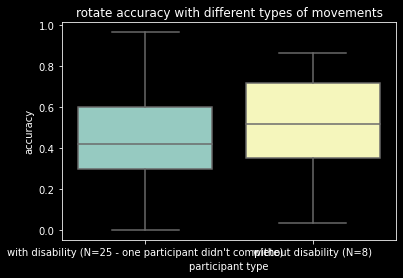

In [34]:
df = pd.DataFrame({'accuracy': accuracy_scores_rotate[~np.isnan(accuracy_scores_rotate)],
                  'participant type': 'with disability (N=25 - one participant didn\'t complete)'})
df = pd.concat([df,pd.DataFrame({'accuracy': accuracy_scores_rotate_unimpaired,
                  'participant type': 'without disability (N=8)'})])
# df
sns.boxplot(data=df,x="participant type",y="accuracy")
plt.title("rotate accuracy with different types of movements")
plt.savefig('figs/one-dollar-rotate.png',dpi=500,bbox_inches='tight')
plt.show()

# standardized

- leave one out? Train templates on all participants except 1 and then test on the last participant? 
- train on all the samples? Or maybe use all as templates idk 
- maybe leave out more than 1 
- also maybe do within-user validation too 

In [35]:
def set_templates(pIDs, n_templates=3):
    random.seed(N_seed)
    test_data_for_dollar = pd.DataFrame() # initialize pandas dataframe
    for participantID in pIDs:
        path = global_path +participantID+"\\"
        save_path = temp_path + participantID + "\\"
        templates_for_dollar = []

        movavg_files = os.listdir(save_path+data_folders[0]+'/')
        experiment_types = pd.DataFrame()
        for pcaf in movavg_files:
            experiment_types = pd.concat([experiment_types,
                pd.DataFrame({'kind':[pcaf.split("_")[2]],
                'motion':[pcaf.split("_")[4]],
                'rep':[pcaf.split("_")[5]],
                'filename':[pcaf]})], ignore_index=True)
        experiment_types = experiment_types[experiment_types['kind'] == 'standardized']
        # print(participantID,len(experiment_types))
        # define templates
        types = ['two-handed-tap', 'point-and-pinch', 'pinch-and-scroll', 'air-tap', 'palm-pinch']
        experiment_types = experiment_types.loc[experiment_types.motion.isin(types)]

        experiment_types['template'] = [False for row in range(len(experiment_types))]
        for ty in types:
            experiment_types.loc[experiment_types[experiment_types['motion'] == ty].sample(n_templates).index,'template'] = True
        templates = experiment_types[experiment_types['template'] == True]
        for t in range(len(templates)):
                fname = templates.filename.iloc[t]
                temp_file = np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[0]+'/' + fname,index_col=0))
                if add_IMU:
                    IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
                    temp_file = np.hstack([temp_file,np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0))])
                elif only_IMU:
                    IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
                    temp_file = np.asarray(pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0))
                df_movavg = temp_file.flatten('F')
                df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
                templates_for_dollar.append((templates.motion.iloc[t],df_movavg.tolist()))
        # define test data
        test_data = experiment_types[experiment_types['template'] == False].copy()
        test_data = test_data.reset_index()
        test_data['classified_motion'] = ['' for e in range(len(test_data))]
        test_data['participant ID'] = participantID
        test_data_for_dollar = test_data_for_dollar.append(test_data,ignore_index=True) 
            
    templates_for_dollar = np.asarray(templates_for_dollar,dtype=object)
    doll = Onedollar(templates_for_dollar)
    return doll, test_data_for_dollar

def get_standardized_accuracy(test_data,doll,participantID):
    for t in range(len(test_data)):
        fname = test_data.loc[t,'filename']
        if add_IMU:
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            EMG_file = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+fname,index_col=0)
            IMU_file = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/'+ IMU_fname,index_col=0)
            df_pca = pd.concat([EMG_file, IMU_file.set_index(EMG_file.index)], axis=1)
        elif only_IMU:
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0)
        else:
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+ fname,index_col=0)
        df_pca = np.asarray(df_pca)
        df_movavg = df_pca.flatten('F')
        df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
        test_data.loc[t,'classified_motion'] = doll.get_gesture(df_movavg.tolist())
    print(participantID,"accuracy: ",accuracy_score(test_data['motion'],test_data['classified_motion']))
    return accuracy_score(test_data['motion'],test_data['classified_motion'])
        

## train on all participants, test on all participants

In [36]:
doll ,test_data_for_dollar = set_templates(pIDs_standardized)
accuracy_scores_standardized = []
for pID in pIDs_standardized:
    test_data = test_data_for_dollar.loc[test_data_for_dollar['participant ID']==pID].reset_index()
    accuracy_scores_standardized.append(get_standardized_accuracy(test_data,doll,pID))
accuracy_scores_standardized = np.asarray(accuracy_scores_standardized)

P104 accuracy:  0.38461538461538464
P105 accuracy:  0.42857142857142855
P111 accuracy:  0.2
P116 accuracy:  0.4857142857142857
P119 accuracy:  0.4
P123 accuracy:  0.7428571428571429
P124 accuracy:  0.40540540540540543
P126 accuracy:  0.5428571428571428
P003 accuracy:  0.5714285714285714
P004 accuracy:  0.5428571428571428
P005 accuracy:  0.5714285714285714
P006 accuracy:  0.6571428571428571
P008 accuracy:  0.6
P010 accuracy:  0.5428571428571428
P011 accuracy:  0.9142857142857143


## leave one participant out

In [37]:
pIDs_standardized = ['P104','P105','P111','P116','P119','P123','P124','P126',
                     'P003','P004','P005','P006','P008','P010','P011']

def get_standardized_accuracy_one(doll,participantID):
    # get the data for the participant
    path = global_path +participantID+"\\"
    save_path = temp_path + participantID + "\\"
    templates_for_dollar = []

    movavg_files = os.listdir(save_path+data_folders[0]+'/')
    experiment_types = pd.DataFrame()
    for pcaf in movavg_files:
        experiment_types = pd.concat([experiment_types,
            pd.DataFrame({'kind':[pcaf.split("_")[2]],
            'motion':[pcaf.split("_")[4]],
            'rep':[pcaf.split("_")[5]],
            'filename':[pcaf]})], ignore_index=True)
    experiment_types = experiment_types[experiment_types['kind'] == 'standardized']
    # define templates
    types = ['two-handed-tap', 'point-and-pinch', 'pinch-and-scroll', 'air-tap', 'palm-pinch']
    experiment_types = experiment_types.loc[experiment_types.motion.isin(types)]
    # define test data
    test_data = experiment_types.copy()
    test_data = test_data.reset_index()
    test_data['classified_motion'] = ['' for e in range(len(test_data))]

    # get accuracy for each test data
    for t in range(len(test_data)):
        fname = test_data.loc[t,'filename']
        if add_IMU:
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            EMG_file = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+fname,index_col=0)
            IMU_file = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/'+ IMU_fname,index_col=0)
            df_pca = pd.concat([EMG_file, IMU_file.set_index(EMG_file.index)], axis=1)
        elif only_IMU:
            IMU_fname = "_".join(fname.split("_")[:3])+'_IMU_'+"_".join(fname.split("_")[4:6])+'_'+data_folders[1]+'.csv'
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[1]+'/' + IMU_fname,index_col=0)
        else:
            df_pca = pd.read_csv(global_path+participantID+'/'+data_folders[0] + '/'+ fname,index_col=0)
        df_pca = np.asarray(df_pca)
        df_movavg = df_pca.flatten('F')
        df_movavg = np.vstack([np.linspace(0,len(df_movavg)-1,len(df_movavg)),df_movavg]).T
        test_data.loc[t,'classified_motion'] = doll.get_gesture(df_movavg.tolist())
    print(participantID,"accuracy: ",accuracy_score(test_data['motion'],test_data['classified_motion']))
    return accuracy_score(test_data['motion'],test_data['classified_motion'])

In [38]:
accuracy_scores_standardized = []
for pp,pID in enumerate(pIDs_standardized):
    pIDs = np.delete(np.asarray(pIDs_standardized),pp)
    doll ,test_data_for_dollar = set_templates(pIDs)
    accuracy_scores_standardized.append(get_standardized_accuracy_one(doll,pID))
accuracy_scores_standardized = np.asarray(accuracy_scores_standardized)

P104 accuracy:  0.5
P105 accuracy:  0.34
P111 accuracy:  0.2
P116 accuracy:  0.5
P119 accuracy:  0.42
P123 accuracy:  0.84
P124 accuracy:  0.46153846153846156
P126 accuracy:  0.42
P003 accuracy:  0.42
P004 accuracy:  0.72
P005 accuracy:  0.68
P006 accuracy:  0.8
P008 accuracy:  0.62
P010 accuracy:  0.58
P011 accuracy:  0.72


# all the figures together

In [3]:
# # the original
# df_dollar = pd.DataFrame({'accuracy': accuracy_scores,
#                   'participant type': 'with (N=26)'})
# df_dollar = pd.concat([df_dollar,pd.DataFrame({'accuracy': accuracy_scores_unimpaired,
#                   'participant type': 'without (N=8)'})])
# df_dollar.to_pickle('data/df_dollar.pkl')

# # just the rotate
# df_rotate = pd.DataFrame({'accuracy': accuracy_scores_rotate[~np.isnan(accuracy_scores_rotate)],
#                   'participant type': 'with (N=25)'})
# df_rotate = pd.concat([df_rotate,pd.DataFrame({'accuracy': accuracy_scores_rotate_unimpaired,
#                   'participant type': 'without (N=8)'})])
# df_rotate.to_pickle('data/df_rotate.pkl')
# # just the standardized
# df_standardized = pd.DataFrame({'accuracy': accuracy_scores_standardized[:8],
#                   'participant type': 'with (N=8)'})
# df_standardized = pd.concat([df_standardized,pd.DataFrame({'accuracy': accuracy_scores_standardized[8:],
#                   'participant type': 'without (N=7)'})])
# df_standardized.to_pickle('data/df_standardized.pkl')

df_dollar = pd.read_pickle('data/df_dollar.pkl')
df_rotate = pd.read_pickle('data/df_rotate.pkl')
df_standardized = pd.read_pickle('data/df_standardized.pkl')

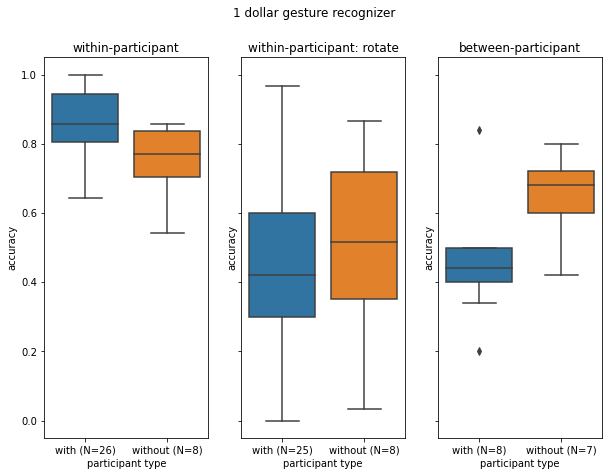

In [4]:
fig,axs = plt.subplots(1,3,figsize=(10,7),sharey=True)

ax = axs[0]
sns.boxplot(data=df_dollar,x="participant type",y="accuracy",ax=ax)
ax.set_title("within-participant")

ax = axs[1]
sns.boxplot(data=df_rotate,x="participant type",y="accuracy",ax=ax)
ax.set_title("within-participant: rotate")

ax = axs[2]
sns.boxplot(data=df_standardized,x="participant type",y="accuracy",ax=ax)
ax.set_title("between-participant")
plt.suptitle('1 dollar gesture recognizer')

figname = '1dollar_test.png'
plt.savefig('figs/'+figname,dpi=150)

plt.show()